# 추가데이터

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, train_test_split
from xgboost import XGBRFRegressor, XGBRegressor

In [69]:
df_raw = pd.read_pickle("/home/pirl/Downloads/FINAL_DATA_0806.pkl")

In [70]:
df_raw["Calendar Day일 2"] = pd.to_datetime(df_raw["Calendar Day일 2"])

In [71]:
df_raw[['품목명','금액','Sales SU','가격']].head()

,품목명,금액,Sales SU,가격
0,CNX 황사마스크 대형1P,49000,27.0,1815
1,UKM 크리넥스 입체마스크 성인용 3P 6G x 3EA,84000,0.0,3000
2,UKM 크리넥스 입체마스크 어린이용 3P 6Gx3EA,57000,0.0,2850
3,CNX 황사마스크 성인용3P,2600,1.0,2600
4,CNX KF94 방역용 마스크 1입,5000,2.0,2500


In [72]:
df_raw["yearmoth"] =df_raw["Calendar Day일 2"].astype(str).str[:7]

In [56]:
df_raw[['year', '건강_응답자', '건강_조율',
       '행정구역(시군구)별(3)', '남자인구', '여자인구', '19', '65', '취약', '도시지역 인구비율 (%)',
       '여/남비율', 'yearmoth']].head()

,year,건강_응답자,건강_조율,행정구역(시군구)별(3),남자인구,여자인구,19,65,취약,도시지역 인구비율 (%),여/남비율,yearmoth
0,2017,1836.0,0.289,NaN,241053.0,231088.0,79099.935484,53281.419355,132381.354839,91.57,0.958661,2017-01
1,2017,1836.0,0.289,NaN,241053.0,231088.0,79099.935484,53281.419355,132381.354839,91.57,0.958661,2017-01
2,2017,1836.0,0.289,NaN,241053.0,231088.0,79099.935484,53281.419355,132381.354839,91.57,0.958661,2017-01
3,2017,910.0,0.269,NaN,81100.0,73281.0,79099.935484,53281.419355,132381.354839,52.24,0.903588,2017-01
4,2017,910.0,0.269,NaN,81100.0,73281.0,79099.935484,53281.419355,132381.354839,52.24,0.903588,2017-01


In [77]:
df = df_raw.groupby(['yearmoth']).mean()
df[['금액','Sales (Bag)','Sales SU','박스입수','수량(CS)','UPC']] =df_raw.groupby(['yearmoth'])[['금액','Sales (Bag)','Sales SU','박스입수','수량(CS)','UPC']].sum()

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


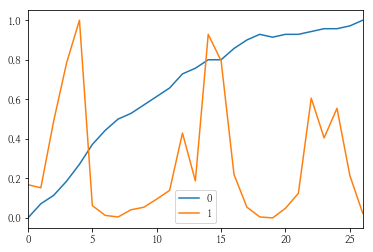

In [91]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
pd.DataFrame(scaler.fit_transform(df[["선행종합지수(2015=100)","금액"]])).plot()

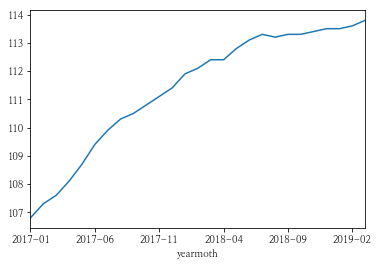

In [90]:
(df["선행종합지수(2015=100)"]).plot()

In [92]:
df = df_raw.groupby(["CUSTOMER NAME","KF규격","지역","구군","Calendar Day일 2"]).mean()
df[['금액','Sales (Bag)','Sales SU','박스입수','수량(CS)','UPC']] =df_raw.groupby(["CUSTOMER NAME","KF규격","지역","구군",'yearmoth'])[['금액','Sales (Bag)','Sales SU','박스입수','수량(CS)','UPC']].sum()

df.head()

UPC  Sales (Bag)  Sales SU  박스입수  \
CUSTOMER NAME KF규격 지역 구군  yearmoth                                              
(주)지에스리테일 본부  0    경기 가평군 2017-01   8.800000e+12            1       1.0    50   
                          2017-05   1.760000e+13            6       3.0    80   
                          2017-07   2.640000e+13            7       2.0   150   
                          2018-01   2.640000e+13           33       0.0   130   
                          2018-05   4.400000e+13           29       1.0   196   

                                    수량(CS)     금액           가격       인구  \
CUSTOMER NAME KF규격 지역 구군  yearmoth                                        
(주)지에스리테일 본부  0    경기 가평군 2017-01      0.0   3000  3000.000000  62457.0   
                          2017-05      0.2  21000  3500.000000  62586.0   
                          2017-07      0.1  20200  2733.333333  62830.0   
                          2018-01      0.7  96180  3121.666667  62814.0   
                          2018-05      0.7  82000  3465.400000  63006.0   

                                    선행종합지수(2015=100)  동행종합지수(2015=100)  ...  \
CUSTOMER NAME KF규격 지역 구군  yearmoth                                      ...   
(주)지에스리테일 본부  0    경기 가평군 2017-01              106.8             105.7  ...   
                          2017-05              108.7             107.0  ...   
                          2017-07              109.9             107.3  ...   
                          2018-01              111.9             108.3  ...   
                          2018-05              112.8             109.4  ...   

                                    건강_응답자  건강_조율     남자인구     여자인구  \
CUSTOMER NAME KF규격 지역 구군  yearmoth                                    
(주)지에스리테일 본부  0    경기 가평군 2017-01    900.0  0.182  31969.0  30488.0   
                          2017-05    900.0  0.182  32000.0  30586.0   
                          2017-07    900.0  0.182  32124.0  30706.0   
                          2018-01    901.0  0.299  32210.0  30604.0   
                          2018-05    901.0  0.299  32272.0  30734.0   

                                              19            65             취약  \
CUSTOMER NAME KF규격 지역 구군  yearmoth                                              
(주)지에스리테일 본부  0    경기 가평군 2017-01   83114.312500  56569.812500  139684.125000   
                          2017-05   85064.363636  50580.704545  135645.068182   
                          2017-07   79543.150000  56010.400000  135553.550000   
                          2018-01   84309.333333  56606.666667  140916.000000   
                          2018-05   76975.103448  53493.689655  130468.793103   

                                    도시지역 인구비율 (%)     여/남비율  판매수량  
CUSTOMER NAME KF규격 지역 구군  yearmoth                                 
(주)지에스리테일 본부  0    경기 가평군 2017-01           31.47  0.953674   3.0  
                          2017-05           31.47  0.955812  12.0  
                          2017-07           31.47  0.955859   7.0  
                          2018-01           31.39  0.950140  33.0  
                          2018-05           31.39  0.952343  12.6  

[5 rows x 53 columns]

In [93]:
df_true = df.reset_index()
pd.DataFrame(list(df_true.columns)).to_excel("/home/pirl/Downloads/test.xlsx")

In [94]:
df_0 = df_true

In [95]:
df_0.drop(['판매수량','Sales SU','수량(CS)','UPC','day','yearmoth',"박스입수","year",'금액'],axis=1, inplace=True)

In [96]:
df_0.columns

Index(['CUSTOMER NAME', 'KF규격', '지역', '구군', 'Sales (Bag)', '가격', '인구',
       '선행종합지수(2015=100)', '동행종합지수(2015=100)', '후행종합지수(2015=100)', 'gdp', '연령',
       '평균소득', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', 'month', '기온(°C)',
       '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)',
       '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '적설(cm)', '3시간신적설(cm)',
       '전운량(10분위)', '중하층운량(10분위)', '최저운고(100m )', '시정(10m)', '지면온도(°C)',
       '미세검색량', '초미세검색량', '건강_응답자', '건강_조율', '남자인구', '여자인구', '19', '65', '취약',
       '도시지역 인구비율 (%)', '여/남비율'],
      dtype='object')

In [97]:
font_location = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font_name = matplotlib.font_manager.FontProperties(fname = font_location).get_name()
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rc('font',family= font_name)

In [98]:
df_0.corr()

,Sales (Bag),가격,인구,선행종합지수(2015=100),동행종합지수(2015=100),후행종합지수(2015=100),gdp,연령,평균소득,SO2,...,초미세검색량,건강_응답자,건강_조율,남자인구,여자인구,19,65,취약,도시지역 인구비율 (%),여/남비율
Sales (Bag),1.000000,-0.022704,0.073755,-0.039327,-0.022274,-0.017149,-0.026042,-0.058996,0.001098,0.075319,...,0.128359,0.025623,0.001120,0.075523,0.071795,0.043033,0.023945,0.038964,0.016024,-0.013680
가격,-0.022704,1.000000,0.019128,0.062687,0.074344,0.082172,0.068080,-0.004275,0.012308,0.011533,...,0.061531,0.001854,0.023732,0.018610,0.019525,0.020058,0.019976,0.021502,0.013114,0.014879
인구,0.073755,0.019128,1.000000,-0.001111,-0.000514,0.002281,-0.000276,-0.368967,0.085689,0.110534,...,0.009348,0.419157,0.178393,0.998235,0.998286,0.289314,0.286825,0.309646,0.249405,0.214350
선행종합지수(2015=100),-0.039327,0.062687,-0.001111,1.000000,0.989846,0.953604,0.953601,0.168746,0.000709,-0.205104,...,0.309374,0.004324,0.210323,-0.002338,-0.000504,0.072104,0.048968,0.068639,-0.012991,0.025154
동행종합지수(2015=100),-0.022274,0.074344,-0.000514,0.989846,1.000000,0.964914,0.960231,0.170693,0.000156,-0.214293,...,0.334308,0.004722,0.209561,-0.001751,0.000028,0.073698,0.052716,0.071166,-0.013559,0.024970
후행종합지수(2015=100),-0.017149,0.082172,0.002281,0.953604,0.964914,1.000000,0.976320,0.176254,-0.000333,-0.143819,...,0.389332,0.011304,0.200186,0.001051,0.002920,0.071646,0.042924,0.066030,-0.013266,0.027456
gdp,-0.026042,0.068080,-0.000276,0.953601,0.960231,0.976320,1.000000,0.172698,0.000594,-0.195854,...,0.331907,0.004031,0.209346,-0.001538,0.000286,0.070898,0.044120,0.065964,-0.013044,0.025677
연령,-0.058996,-0.004275,-0.368967,0.168746,0.170693,0.176254,0.172698,1.000000,-0.181702,0.017924,...,0.065180,-0.030422,0.224381,-0.386405,-0.350287,-0.227979,-0.089851,-0.192400,-0.308476,0.177246
평균소득,0.001098,0.012308,0.085689,0.000709,0.000156,-0.000333,0.000594,-0.181702,1.000000,0.039151,...,0.008568,-0.111053,0.344208,0.062521,0.107509,0.039491,-0.036060,0.013765,0.197336,0.440550
SO2,0.075319,0.011533,0.110534,-0.205104,-0.214293,-0.143819,-0.195854,0.017924,0.039151,1.000000,...,0.107521,0.102318,0.111205,0.106111,0.114959,0.005624,0.031467,0.015831,0.190305,0.094375


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


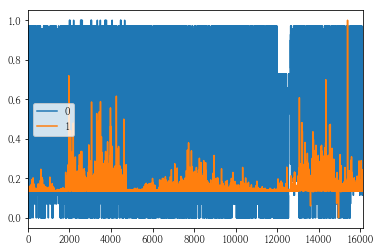

In [67]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler,
scaler = MinMaxScaler()
pd.DataFrame(scaler.fit_transform(df_0[["선행종합지수(2015=100)","Sales (Bag)"]])).plot()

In [68]:
pd.DataFrame(scaler.fit_transform(df_0[["선행종합지수(2015=100)","Sales (Bag)"]]))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,0,1
0,5.329071e-15,0.136998
1,2.714286e-01,0.137337
2,4.428571e-01,0.137405
3,7.285714e-01,0.139168
4,8.571429e-01,0.138896
5,9.285714e-01,0.136998
6,9.428571e-01,0.142082
7,4.428571e-01,0.137066
8,6.142857e-01,0.137066
9,9.285714e-01,0.137270


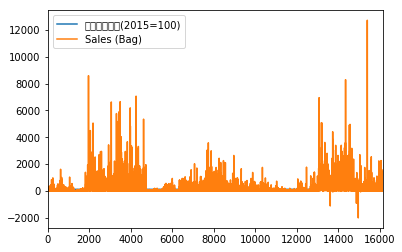

In [63]:
df_0[["선행종합지수(2015=100)","Sales (Bag)"]].plot()

In [ ]:
scaler.fit_transform(df_numeric)

In [45]:
df_0.dropna(inplace=True)
df_0.month = df_0.month.astype(str)
df_0 = pd.get_dummies(df_0)
df_0.head()


,Sales (Bag),가격,인구,선행종합지수(2015=100),동행종합지수(2015=100),후행종합지수(2015=100),gdp,연령,평균소득,SO2,...,구군_처인구,구군_파주시,구군_팔달구,구군_평택시,구군_포천시,구군_하남시,구군_화성시,month_1.0,month_2.0,month_3.0
0,9,3000.000000,58195.0,113.5,110.0,112.5,402678.4,41.6,1475779.0,0.004426,...,0,0,0,0,0,0,0,1,0,0
1,10,2500.000000,325766.0,113.6,109.7,112.8,402678.4,40.9,1308638.0,0.006108,...,0,0,0,0,0,0,0,0,1,0
2,40,3155.727273,364472.0,113.6,109.7,112.8,402678.4,40.6,1346374.0,0.005516,...,0,0,0,0,0,0,0,0,1,0
3,11,2741.000000,203181.0,113.5,110.0,112.5,402678.4,40.8,1322650.0,0.005139,...,0,0,0,0,0,0,0,1,0,0
4,8,2966.666667,202687.0,113.6,109.7,112.8,402678.4,40.9,1322650.0,0.005654,...,0,0,0,0,0,0,0,0,1,0


In [46]:
#종속변수, 독립변수 분할
df_raw_y = df_0['Sales (Bag)']
df_raw_x = df_0.drop(['Sales (Bag)'],axis=1,inplace=False)
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y, test_size=0.3,random_state=1234)

In [47]:
tree_uncustumized = RandomForestRegressor(random_state=124)
tree_uncustumized.fit(df_train_x,df_train_y)

print(tree_uncustumized.score(df_train_x,df_train_y))

print(tree_uncustumized.score(df_test_x,df_test_y))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8851457779541156
0.16565815331964007


In [48]:
tree_uncustumized = XGBRegressor(random_state=1234)
tree_uncustumized.fit(df_train_x,df_train_y)

print(tree_uncustumized.score(df_train_x,df_train_y))

print(tree_uncustumized.score(df_test_x,df_test_y))

[15:36:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/home/pirl/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.8518464429475529
0.3783543719666865


In [49]:
tree_uncustumized

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=1234,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [50]:
train_score = []
validation_score = []

para_n_tree = [n_tree*1 for n_tree in range(20,30)]

for v_n_estimator in para_n_tree :
    rf =RandomForestRegressor(random_state=1234,n_estimators=v_n_estimator)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    validation_score.append(rf.score(df_test_x,df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] =para_n_tree
df_score_n["TrainScore"] =train_score
df_score_n["ValidationScore"] =validation_score
df_score_n.round(3)

,n_estimators,TrainScore,ValidationScore
0,20,0.908,0.244
1,21,0.908,0.250
2,22,0.909,0.247
3,23,0.909,0.246
4,24,0.908,0.245
5,25,0.907,0.241
6,26,0.908,0.238
7,27,0.910,0.212
8,28,0.913,0.201
9,29,0.914,0.204


In [51]:
train_score = []
validation_score = []

para_n_tree = [n_tree*1 for n_tree in range(60,80)]

for v_n_estimator in para_n_tree :
    rf =RandomForestRegressor(random_state=1234,n_estimators=11,
                              min_samples_leaf=1, min_samples_split= 2, max_depth=24)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    validation_score.append(rf.score(df_test_x,df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] =para_n_tree
df_score_n["TrainScore"] =train_score
df_score_n["ValidationScore"] =validation_score
df_score_n.round(3)

,n_estimators,TrainScore,ValidationScore
0,60,0.886,0.229
1,61,0.886,0.229
2,62,0.886,0.229
3,63,0.886,0.229
4,64,0.886,0.229
5,65,0.886,0.229
6,66,0.886,0.229
7,67,0.886,0.229
8,68,0.886,0.229
9,69,0.886,0.229


In [72]:
rf

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.216, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=94,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=1234,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [96]:
train_score = []
validation_score = []

para_n_tree = [n_tree*1 for n_tree in range(1,20)]

for v_n_estimator in para_n_tree :
    rf =XGBRegressor(random_state=1234,n_estimators=84, learning_rate=0.216, max_depth=3,reg_lambda=0.3,scale_pos_weight=7, tree_method='gpu_hist')
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    validation_score.append(rf.score(df_test_x,df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] =para_n_tree
df_score_n["TrainScore"] =train_score
df_score_n["ValidationScore"] =validation_score
df_score_n.round(3)

[14:43:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:43:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:43:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:43:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:43:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:43:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:43:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:43:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

,n_estimators,TrainScore,ValidationScore
0,1,0.862,0.654
1,2,0.862,0.654
2,3,0.862,0.654
3,4,0.862,0.654
4,5,0.862,0.654
5,6,0.862,0.654
6,7,0.862,0.654
7,8,0.862,0.654
8,9,0.862,0.654
9,10,0.862,0.654


In [55]:
tree_uncustumized

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=1234,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [46]:
tree_uncustumized = RandomForestRegressor(random_state=1234)
tree_uncustumized.fit(df_train_x,df_train_y)

print(tree_uncustumized.score(df_train_x,df_train_y))

print(tree_uncustumized.score(df_test_x,df_test_y))

0.8800117899130493
0.7255003917310746


In [20]:
train_score = []
validation_score = []

para_n_tree = [n_tree*10 for n_tree in range(1,5)]

for v_n_estimator in para_n_tree :
    rf =RandomForestRegressor(random_state=1234,n_estimators=v_n_estimator)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    validation_score.append(rf.score(df_test_x,df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] =para_n_tree
df_score_n["TrainScore"] =train_score
df_score_n["ValidationScore"] =validation_score
df_score_n.round(3)

,n_estimators,TrainScore,ValidationScore
0,10,0.880,0.726
1,20,0.906,0.706
2,30,0.919,0.706
3,40,0.925,0.693


In [19]:
train_score = []
val_score = []

para_n_leaf = [n_leaf*1 for n_leaf in range(1,10)]

for v_min_samples_leaf in para_n_leaf :
    rf = RandomForestRegressor(random_state=1234, n_estimators=11, min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    val_score.append(rf.score(df_test_x,df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSampleLeaf"] =para_n_leaf
df_score_leaf["TrainScore"] =train_score
df_score_leaf["ValidationScore"] =val_score

In [156]:
df_score_leaf.round(3)

,MinSampleLeaf,TrainScore,ValidationScore
0,1,0.876,0.729
1,2,0.825,0.647
2,3,0.754,0.638
3,4,0.705,0.583
4,5,0.667,0.565
5,6,0.653,0.556
6,7,0.617,0.539
7,8,0.599,0.527
8,9,0.578,0.511


In [21]:
train_score = []
test_score = []

para_split = [n_split*2 for n_split in range(1,18)]

for v_min_samples_split in para_split :
    rf = RandomForestRegressor(random_state=1234, n_estimators=11,min_samples_leaf=1, min_samples_split=v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSampleSplit"] =para_split
df_score_split["TrainScore"] =train_score
df_score_split["ValidationScore"] =test_score

In [22]:
df_score_split.round(3)

,MinSampleSplit,TrainScore,ValidationScore
0,2,0.876,0.729
1,4,0.842,0.700
2,6,0.815,0.696
3,8,0.784,0.693
4,10,0.770,0.686
5,12,0.753,0.689
6,14,0.741,0.679
7,16,0.729,0.680
8,18,0.714,0.666
9,20,0.693,0.650


In [23]:
train_score = []
test_score = []

para_depth = [depth for depth in range(25,35)]

for v_max_depth in para_depth :
    rf = RandomForestRegressor(random_state=1234, n_estimators=11,min_samples_leaf=1,min_samples_split=2, max_depth=v_max_depth)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["MaxDepth"] =para_depth
df_score_depth["TrainScore"] =train_score
df_score_depth["ValidationScore"] =test_score
df_score_depth.round(3)

,MaxDepth,TrainScore,ValidationScore
0,25,0.875,0.712
1,26,0.881,0.705
2,27,0.874,0.706
3,28,0.873,0.714
4,29,0.873,0.716
5,30,0.876,0.729
6,31,0.876,0.729
7,32,0.876,0.729
8,33,0.876,0.729
9,34,0.876,0.729


In [24]:
train_score=[]
test_score=[]

gf_final =RandomForestRegressor(random_state=1234, n_estimators=11,min_samples_leaf=1,min_samples_split=2, max_depth=30)
gf_final.fit(df_train_x,df_train_y)
train_score.append(gf_final.score(df_train_x,df_train_y))

test_score.append(gf_final.score(df_test_x,df_test_y))
print("Score on training set :" ,(gf_final.score(df_train_x,df_train_y)).round(3))

print("Score on test set :" ,(gf_final.score(df_test_x,df_test_y)).round(3))

Score on training set : 0.876
Score on test set : 0.729


In [41]:
train_score=[]
test_score=[]

gf_final =RandomForestRegressor(random_state=1234,n_estimators=11,
                              min_samples_leaf=1, min_samples_split= 2, max_depth=24)
gf_final.fit(df_train_x,df_train_y)
train_score.append(gf_final.score(df_train_x,df_train_y))

test_score.append(gf_final.score(df_test_x,df_test_y))
print("Score on training set :" ,(gf_final.score(df_train_x,df_train_y)).round(3))

print("Score on test set :" ,(gf_final.score(df_test_x,df_test_y)).round(3))
rf 

Score on training set : 0.878
Score on test set : 0.714


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=24,
           max_features=79, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=11, n_jobs=None, oob_score=False,
           random_state=1234, verbose=0, warm_start=False)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [44]:
mean_absolute_error(df_test_y,gf_final.predict(df_test_x))

60.3725816218756

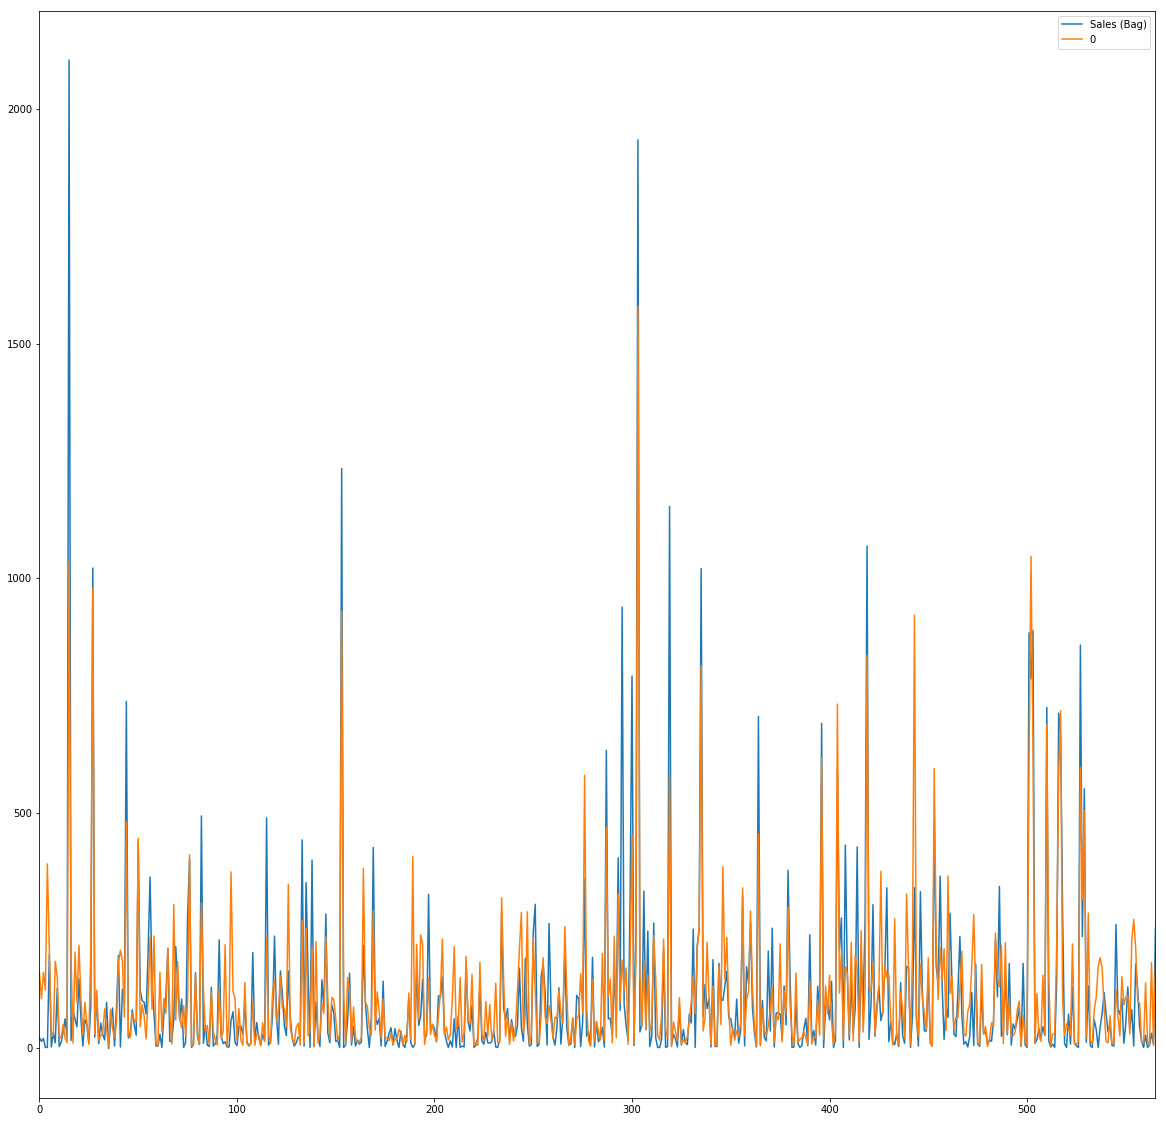

In [45]:
pd.DataFrame(gf_final.predict(df_test_x),df_test_y).reset_index().plot(figsize=(20,20))

In [46]:
pd.DataFrame(gf_final.predict(df_test_x),df_test_y).reset_index()

,Sales (Bag),0
0,22,160.181818
1,14,104.363636
2,20,161.181818
3,1,123.363636
4,1,391.818182
5,199,203.454545
6,2,24.363636
7,33,26.371212
8,11,184.454545
9,127,151.454545


In [47]:
import matplotlib.font_manager as fm
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font',family= font_name)
import warnings
warnings.filterwarnings('ignore')

In [53]:
df_importance = pd.DataFrame()
df_importance["Feature"] = df_train_x.columns
df_importance["Importance"] = gf_final.feature_importances_

df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
71,구군_권선구,0.076
44,CUSTOMER NAME_㈜신세계 이마트부문,0.068
12,PM10,0.047
16,풍속(m/s),0.047
0,가격,0.045
2,선행종합지수(2015=100),0.037
31,지면온도(°C),0.036
52,KF규격_KF94,0.034
49,CUSTOMER NAME_홈플러스테스코(주),0.033
13,PM25,0.031


In [54]:
df_importance = df_importance[df_importance['Importance']>0.02]

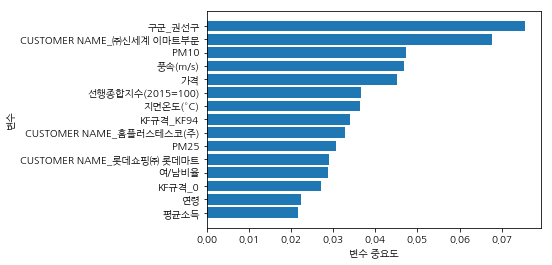

In [55]:
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")
plt.show()